In [1]:
# the first thing is to import pandas and datatime
import matplotlib.pyplot as plt
import csv
import shapefile
import pandas as pd
from shapely.geometry import Point, Polygon, mapping
from fiona import collection
import geopandas as gpd
import shapely.geometry as Polygon
import datetime
from datetime import datetime
import numpy as np
import filecmp
from geopandas import GeoDataFrame as gdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#MAGIC  - render the figure in the notebook.
%matplotlib inline

In [2]:
# we know that the lat long is north-west, turn them into floating pt values
def lat_lon_to_float(v):  
    '''convert strings from NHC to float locations'''
    if(v[-1] == 'S') or (v[-1] == 'W'):
        multiplier = -1
    else:
        multiplier = 1
    return float(v[:-1]) * multiplier

In [3]:
hurdata = []
with open ('hurdat2.txt','r') as f:
    for line in f.readlines():
        if line.startswith('AL'):
            storm_id = line.split(',')
            storm_number = storm_id[0].strip()
            storm_name = storm_id[1].strip() 
        else:
            location_line = line.split(',')
            dt = datetime.strptime(location_line[0]+location_line[1], '%Y%m%d %H%M' )
            storm_status = location_line[3].strip()
            storm_lat = lat_lon_to_float(location_line[4].strip())
            storm_lon = lat_lon_to_float(location_line[5].strip())
            max_speed = float(location_line[7].strip())
            hurdata.append([storm_number, storm_name, storm_status, storm_lat, storm_lon, dt, max_speed])

In [4]:
df = pd.DataFrame(hurdata, columns= ['Storm Number','Storm Name','Storm Status','Lat','Lon','Time', 'Max Speed'])
df.head()

,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Max Speed
0,AL011851,UNNAMED,HU,28.0,-94.8,1851-06-25 00:00:00,-999.0
1,AL011851,UNNAMED,HU,28.0,-95.4,1851-06-25 06:00:00,-999.0
2,AL011851,UNNAMED,HU,28.0,-96.0,1851-06-25 12:00:00,-999.0
3,AL011851,UNNAMED,HU,28.1,-96.5,1851-06-25 18:00:00,-999.0
4,AL011851,UNNAMED,HU,28.2,-96.8,1851-06-25 21:00:00,-999.0


In [83]:
plot_crs = ccrs.LambertConformal(central_longitude =-100., central_latitude = 45)
data_crs = ccrs.PlateCarree()

In [5]:
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(1,1,1,projection = plot_crs)

ax.set_extent([-90,-75,28,42],data_crs)
ax.coastlines('50m', edgecolor = 'k', linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)
ax.add_feature(cfeature.RIVERS, linewidth = 0.85, color = "b")
ax.add_feature(cfeature.COASTLINE, linewidth = 0.5)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAKES, color = 'b')

for storm in df['Storm Number'].unique():
    storm_data = df[df['Storm Number'] == storm_number]
    ax.plot(storm_data['Lon'], storm_data['Lat'], transform = data_crs)

NameError: name 'plot_crs' is not defined

<Figure size 432x432 with 0 Axes>

In [6]:
for storm in df['Storm Number'].unique():
    storm_data = df[df['Storm Number'] == storm_number]
    ax.plot(storm_data['Lon'], storm_data['Lat'], transform = data_crs)

NameError: name 'ax' is not defined

In [7]:
#dataframes for csv files 
# Dont forget to change the file location for when you move the DATA!!!

dfbuffer = pd.read_csv('JRBufferPtLatLon.csv', delimiter = ',')
dfhurdat = pd.read_csv('hurdatlatlong.csv', delimiter = ',')
dfcoast = pd.read_csv('CoastalThresholdLatLon.csv', delimiter = ',')
dfbasin = pd.read_csv('JamesBasinPtLatLon.csv', delimiter = ',')

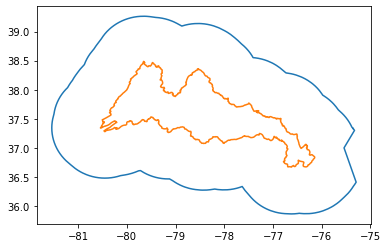

In [8]:
# producing the polygons for the basin and the 60nmi buffer #
#print(bufferpoints)
#bufferpoints.plot()
#buffershape = Polygon(bufferpoints)
#print(dfbuffer['Lon'])
#print(dfbuffer['Lat'])
bufferpoly = zip(dfbuffer['Lon'],dfbuffer['Lat'])
basinpoly = zip(dfbasin['Lon'],dfbasin['Lat'])
plt.figure()
plt.plot(dfbuffer['Lon'],dfbuffer['Lat']) 
plt.plot(dfbasin['Lon'],dfbasin['Lat'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#MAGIC  - render the figure in the notebook.
%matplotlib inline
# set coordinate ref. systems
plot_crs =ccrs.LambertConformal(central_longitude = -100., central_latitude = 45)
data_crs =ccrs.PlateCarree()

#figures
fig = plt.figure(figsize = (6,6))

#axis
ax = plt.subplot(1,1,1, projection=plot_crs)
#left side,right side, bottom, top is the order below.
ax.set_extent([-90, -75, 30, 40], data_crs)


#background map
ax.stock_img()
ax.add_feature(cfeature.STATES, linewidth = 0.5)
ax.add_feature(cfeature.RIVERS, linewidth = 0.85, color = "b")
ax.add_feature(cfeature.COASTLINE, linewidth = 0.5)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, color = 'b')

Geometry must be a Point or LineString


In [ ]:
#for i in range(length_storms):
#dummy = np.argwhere(storm_values == storm_index[0])
#print(dummy)
    

In [ ]:
#df.to_csv('hurdatlatlong.csv')

In [ ]:
with open('hurdatlatlong.csv','r') as hurdat:
    with open('coastlatlongV2.csv','r') as coast:
        with open('jamesbasinlatlongV2.csv','r')as basin:
            with open('bufferlatlongV2.csv', 'r') as buffer:
                with open('commonlatlong.txt','w') as newfile:
                    for line in hurdat:
                        if line == coast and line == basin and line == buffer:
                            newfile.write(line)
hurdat.close()
coast.close()
basin.close()
buffer.close()
newfile.close()
